In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile as tf

In [2]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [3]:

sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = 3.577851226661945105e+01

sequence = "D:/Downloads/Archive/seq.tif"
reference_sequence = "D:/Downloads/Archive/ref_seq.tif"
reference_sequence_period = 2.835414623487623942e+01

og = BOG()
og.logger.set_quiet()
og.settings["matching_method"] == "SSD"
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run(bias_correct=False)

og_bc = BOG()
og_bc.logger.set_quiet()
og_bc.settings["matching_method"] == "jSAD"
og_bc.set_sequence(sequence)
og_bc.set_reference_sequence(reference_sequence)
og_bc.set_reference_period(reference_sequence_period)
og_bc.run(bias_correct=False)

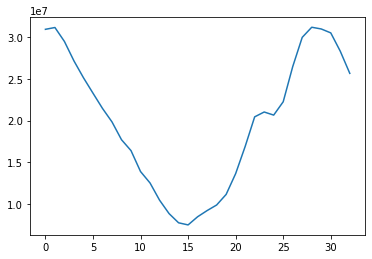

In [4]:
plt.plot(og.sads[0])

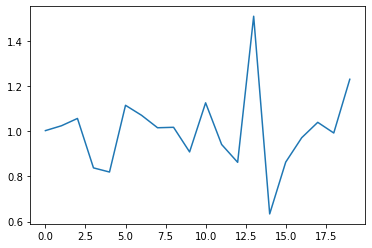

In [5]:
plt.plot(og.delta_phases[100:120])

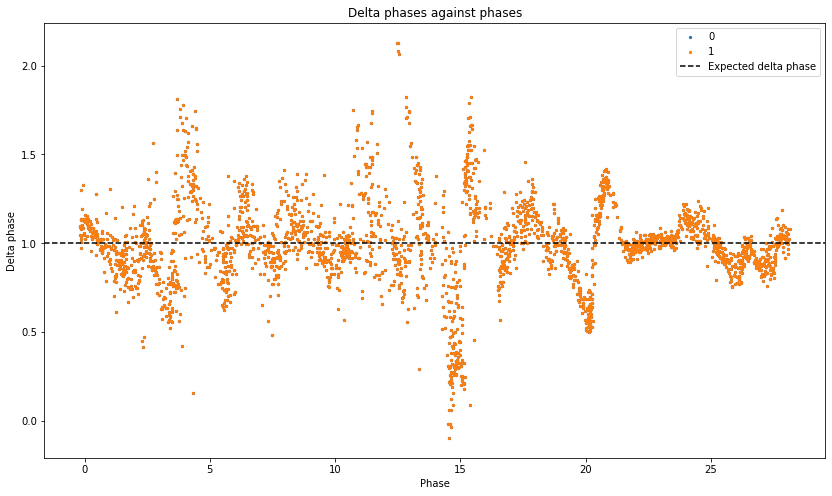

In [6]:
bogp = BOGP([og, og_bc])
bogp.plot_delta_phases_phases()



In [7]:
reference_sequence = tf.imread("D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/rbc_only_ref.tif").astype(np.int32)
sequence = tf.imread("D:/Data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/rbc_only.tif").astype(np.int32)

In [8]:
sads = []
for i in range(sequence.shape[0]):
    sad = []
    for j in range(reference_sequence.shape[0]):
        sad.append(np.sum(np.abs(sequence[i] - reference_sequence[j])))
    sads.append(sad)

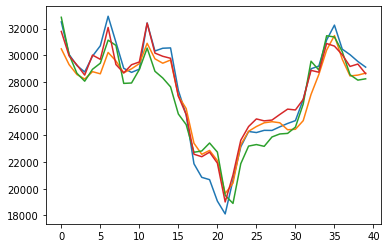

In [9]:
plt.plot(sads[100])
plt.plot(sads[136])
plt.plot(sads[171])
plt.plot(sads[522])

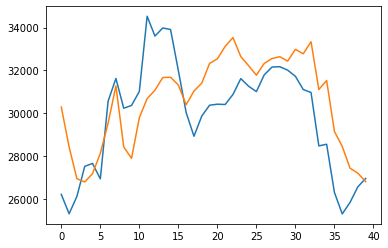

In [10]:
plt.plot(sads[115])
plt.plot(sads[152])